## **1) 🔎 Análisis Exploratorio de Datos**
*by Uriel Emiliano Mendez*


Este proyecto consiste en la predicción de la supervivencia de los pasajeros del Titanic utilizando técnicas de Machine Learning. Utilizando el conjunto de datos disponible en Kaggle, he aplicado diversas estrategias de análisis, limpieza de datos y modelos de clasificación para predecir quién sobrevivió al naufragio.

In [209]:
import pandas as pd
import re

In [210]:
# Visual Studio Code
df_main = pd.read_csv('../datasets/titanic-train.csv')
df_ext = pd.read_csv('../datasets/titanic-train-extended.csv')

# Google colab
# from google.colab import drive
# drive.mount('/content/drive')
# df_main = pd.read_csv('/content/drive/MyDrive/IES/2º Semestre/Aprendizaje Automatico I/Notebooks/Titanic/Titanic-Dataset.csv')
# df_ext = pd.read_csv('/content/drive/MyDrive/IES/2º Semestre/Aprendizaje Automatico I/Notebooks/Titanic/Titanic-Dataset-Extendido.csv')

print(df_main.shape, df_ext.shape)

(891, 12) (891, 21)


### Pruebas empiricas 🗂️

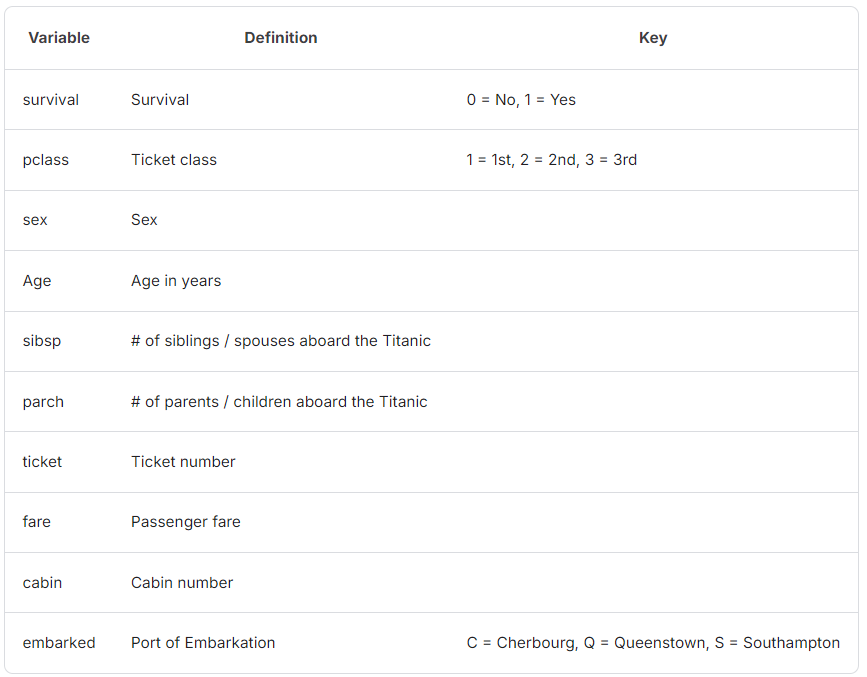

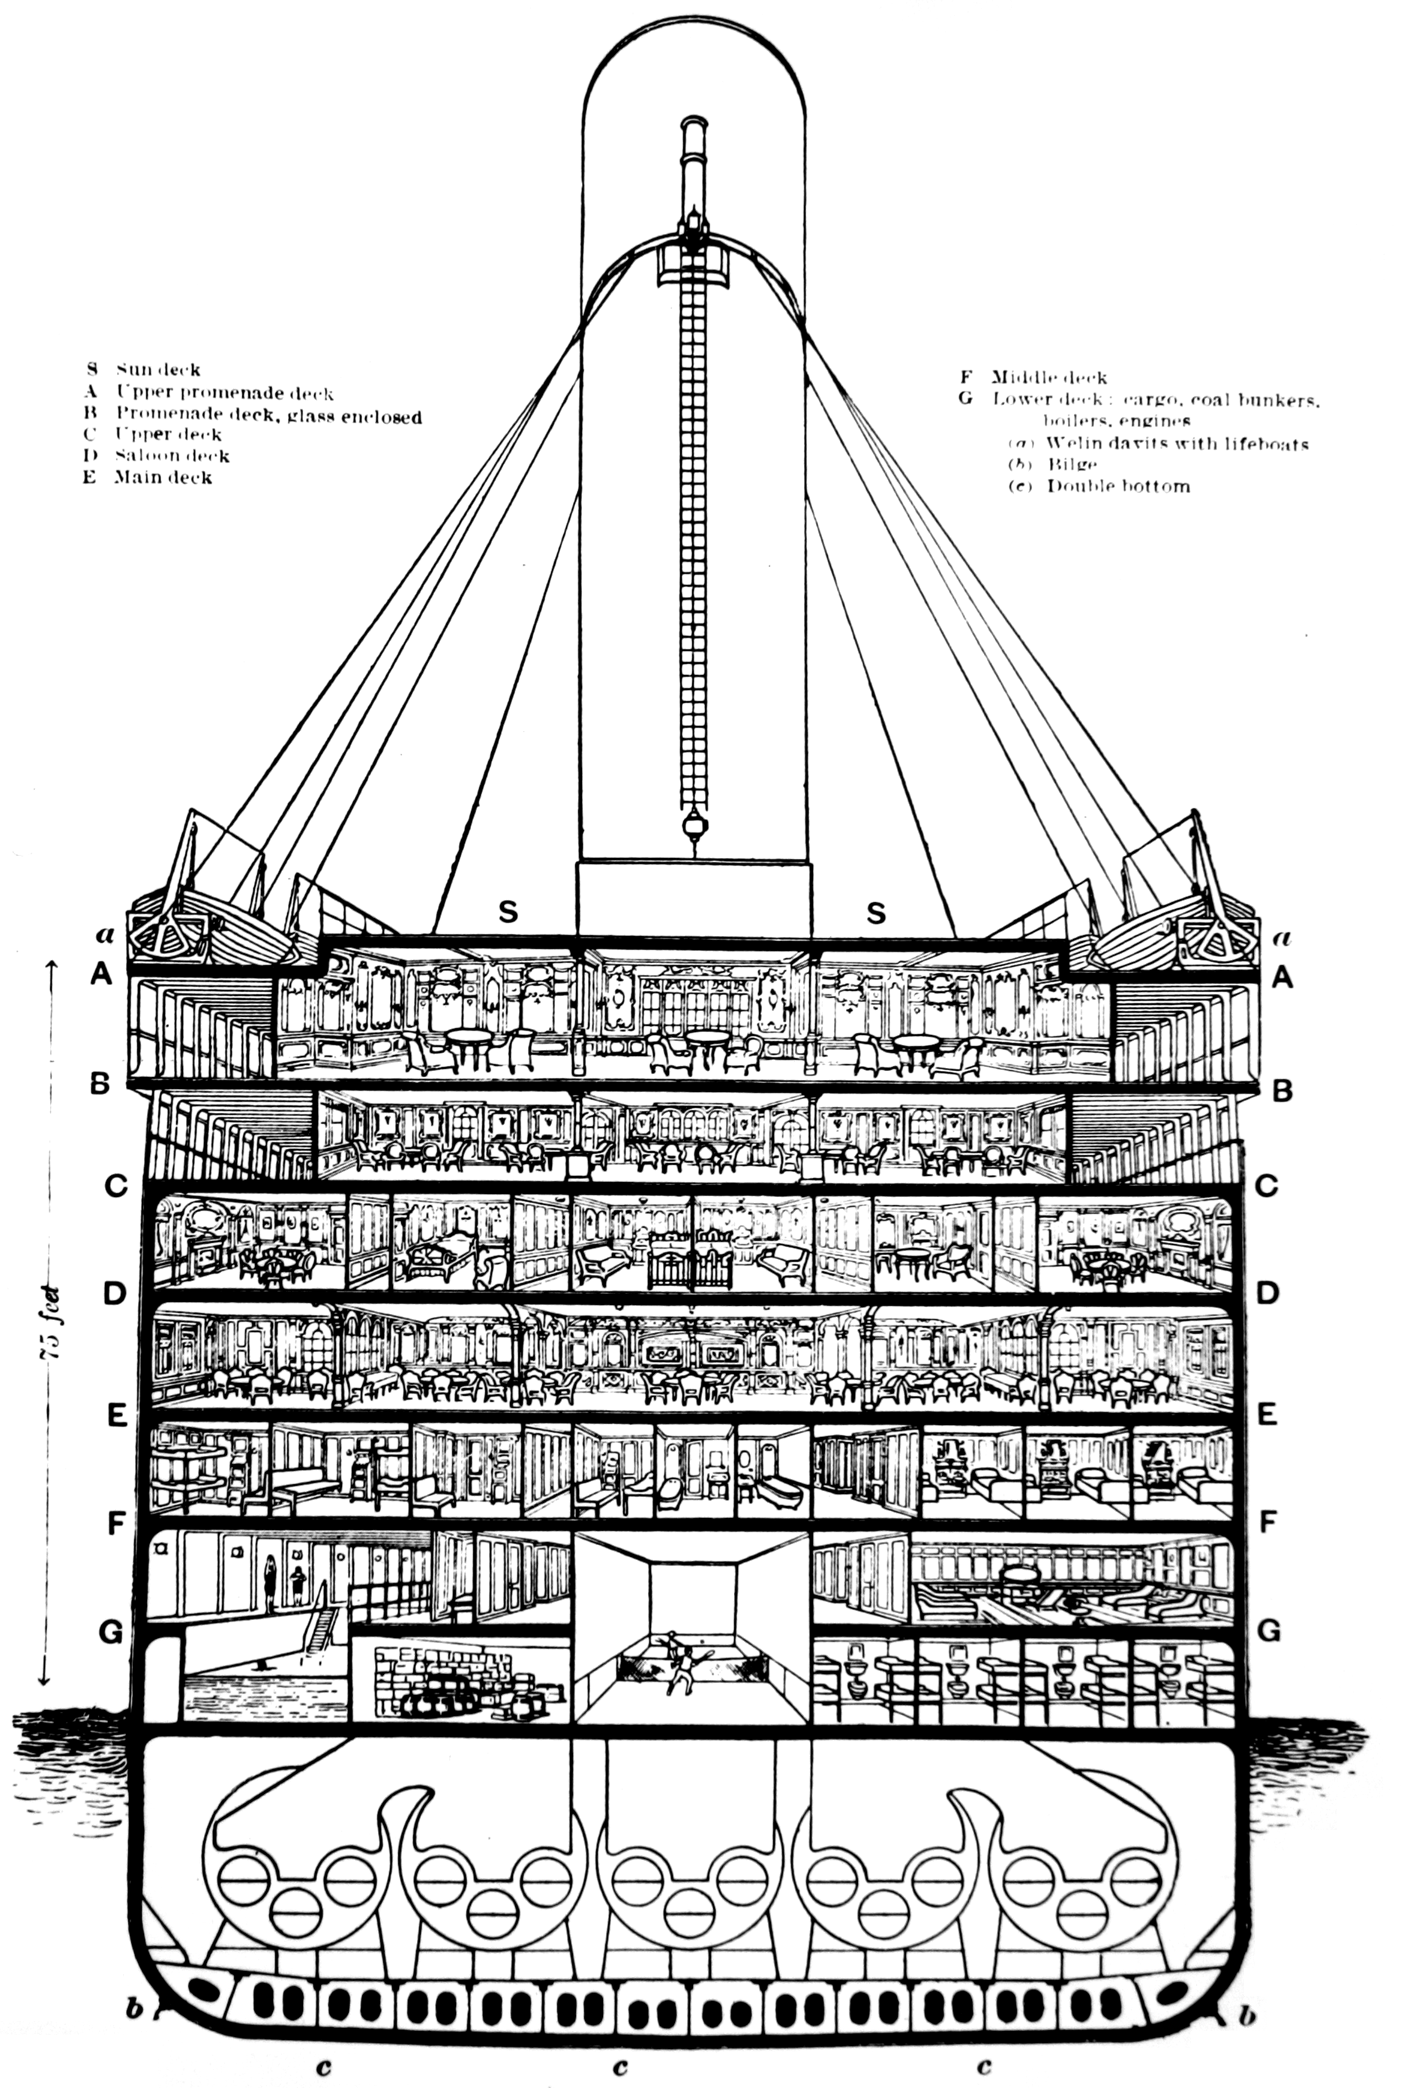

### Análisis preliminar 🕵️

Como primer paso, voy a ver si existen registros duplicados en el dataset. En caso de haber, los elimino.

In [211]:
df = df_main.copy()
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S


In [212]:
print('Cantidad de duplicados en el dataset:',df.duplicated().sum())
df.drop_duplicates(inplace = True)

Cantidad de duplicados en el dataset: 0


Elimino las columnas que no son de utilidad para el análisis, como lo son las columnas `Ticket`, `PassengerId` y `Cabin` (que tiene mas del 70% de los valores nulos).

In [213]:
# Muestro que procentaje de faltantes tiene cada columna
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Aunque la columna `Cabin` me podria ser de gran ayuda, decido eliminarla por su gran cantidad de datos faltantes. Podria hacer un *web scraping* para conseguir los datos faltantes, pero creo que lleva su debido tiempo y no vale la pena.

In [214]:
df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Noto que la columna `Embarked` tiene dos valores nulos, pero no los elimino ya que mas adeltante estaré imputando valores nuevos.

In [215]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Graficos 📊

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Grafico para ver la distribucion de sobrevivientes y fallecidos por sexo.

<Figure size 200x200 with 0 Axes>

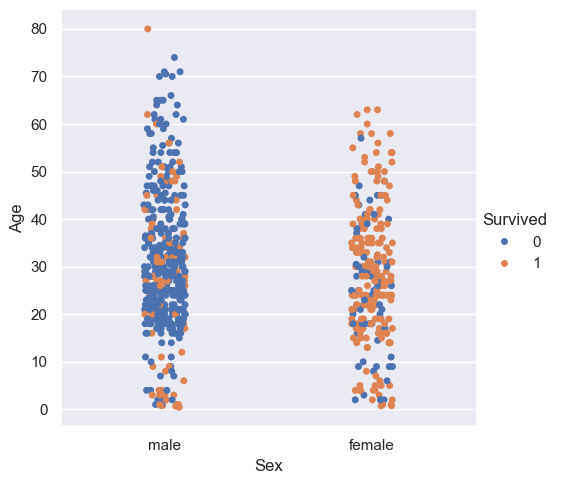

In [217]:
plt.figure(figsize = (2, 2))
sns.catplot(data = df, y = 'Age', x = 'Sex', hue = 'Survived')
plt.show()

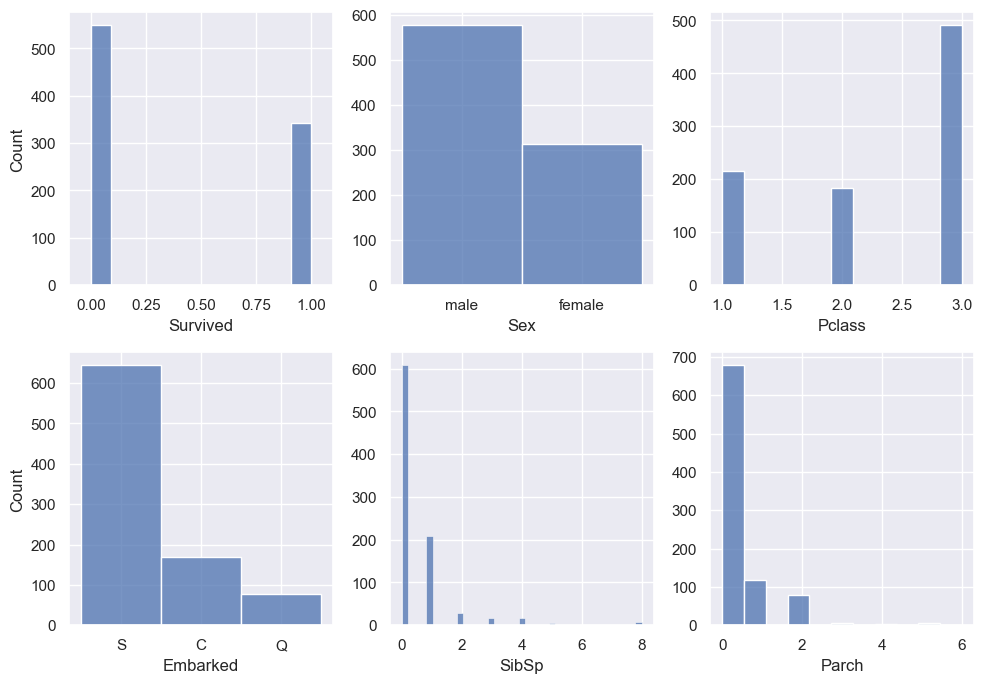

In [218]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = df, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = df, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "Parch").set(ylabel = None)

plt.tight_layout()

plt.show()

**Gracias a los graficos de arriba, puedo determinar que:**

- `Survived`: El número de personas que no sobrevivieron supera en más de 300 a quienes sí lo hicieron.

- `Sex`: En el Titanic, la cantidad de hombres casi duplicaba la de mujeres.

- `Pclass`: La suma de pasajeros en primera y segunda clase es casi idéntica a la cantidad de pasajeros en tercera clase.

- `Embarked`: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (S).

- `SibSp`: Más de 800 pasajeros viajaron sin compañía, mientras que el resto lo hizo con su pareja o algún miembro de la familia.

- `Parch`: Casi todos los pasajeros viajaban sin padres o hijos, y solo una pequeña fracción lo hacía en compañía de ellos.

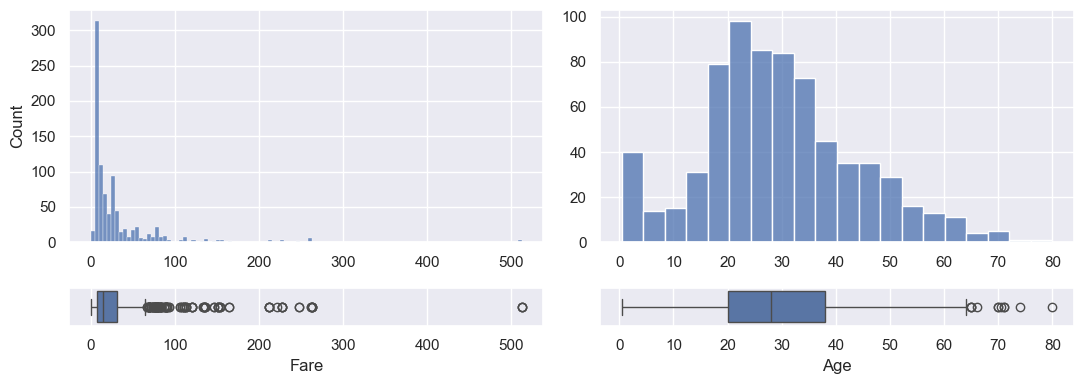

In [219]:
fig, axis = plt.subplots(2, 2, figsize = (11, 4), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Fare")
sns.histplot(ax = axis[0, 1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Age")

plt.tight_layout()
plt.show()

Grafico para mostrar en porcentaje y cantidad, las personas que sobrevivieron y las que no, agrupado por sexo.

<Figure size 300x300 with 0 Axes>

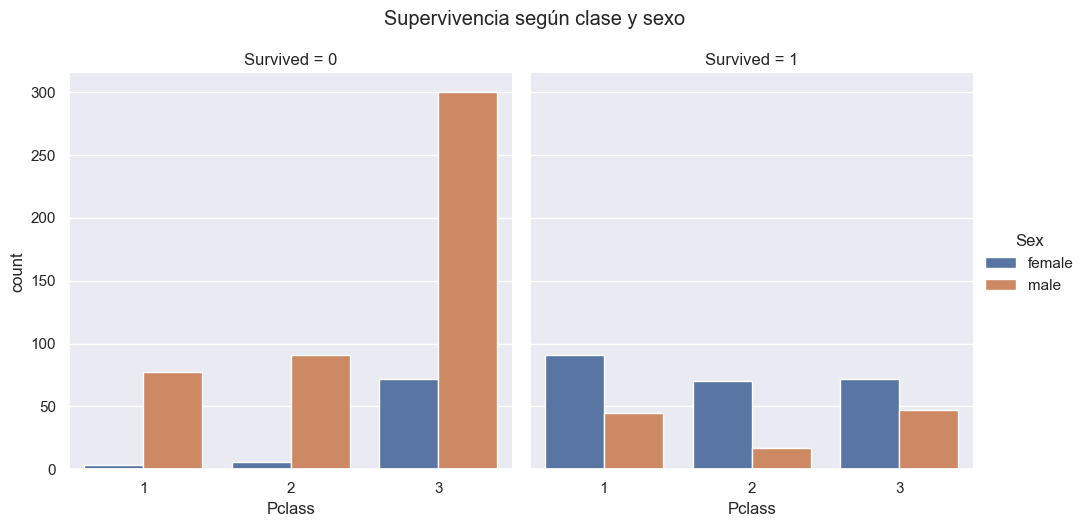

In [220]:
plt.figure(figsize=(3, 3))
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.suptitle('Supervivencia según clase y sexo', y=1.05)
plt.show()

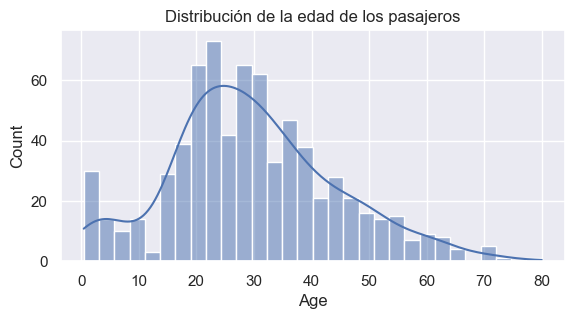

In [221]:
plt.figure(figsize=(6.5, 3))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de la edad de los pasajeros')
plt.show()

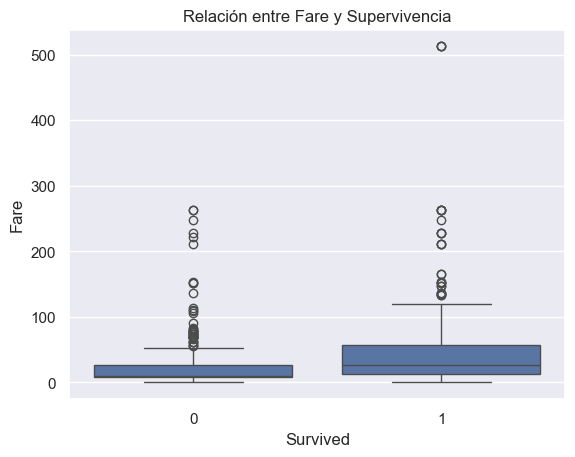

In [222]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Relación entre Fare y Supervivencia')
plt.show()

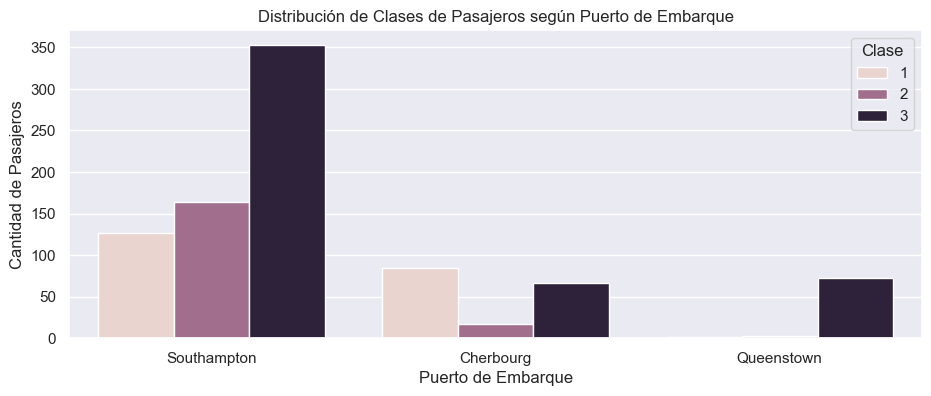

In [223]:
plt.figure(figsize=(11, 4))
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.title("Distribución de Clases de Pasajeros según Puerto de Embarque")
plt.xlabel("Puerto de Embarque")
plt.ylabel("Cantidad de Pasajeros")
plt.xticks([0, 1, 2], ["Southampton", "Cherbourg", "Queenstown"])
plt.legend(title="Clase", labels=[1, 2, 3])
plt.show()

En este punto, me interesa crear una columna que unifique la cantidad de familiares que tiene un pasajero, ya sea esposo/a, hijos/as o simplemente familiares. Para esto, creo la columna `FamilySize` y elimino las columna de `SibSp` y `Parch`.

In [224]:
df.loc[:, 'FamilySize'] = df.SibSp + df.Parch
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,15.5000,Q,1
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,12.8750,C,0
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,77.9583,S,0


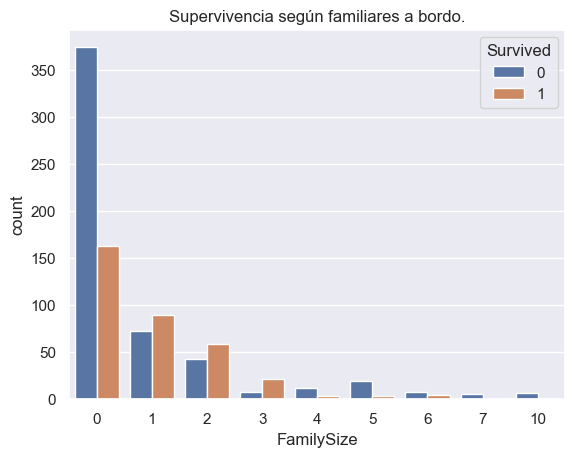

In [225]:
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Supervivencia según familiares a bordo.')
plt.show()

Ahora lo que me interesa es conocer la distribución de supervivencia en los pasajeros que viajaban solos. Para esto hago un grafico de barras que me diga quien sobrevivio y quien fallecio.

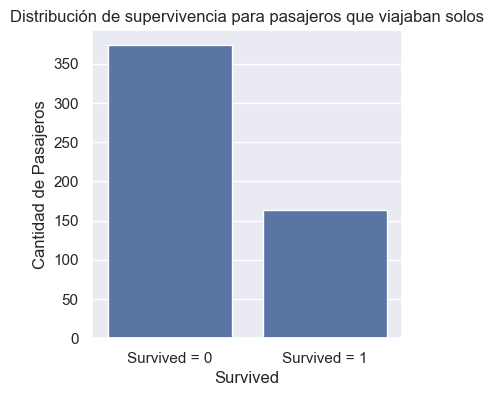

In [226]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df.loc[df.FamilySize == 0], x='Survived')
plt.title("Distribución de supervivencia para pasajeros que viajaban solos")
plt.ylabel("Cantidad de Pasajeros")
plt.xticks([0, 1], ["Survived = 0", "Survived = 1"])
plt.show()

Para agregar mas información al grafico de arriba, voy a segmentar por clase para entender mejor la distribución.

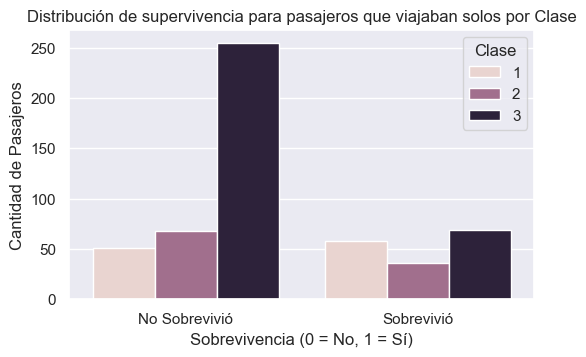

In [227]:
plt.figure(figsize=(6, 3.5))
sns.countplot(data=df[df['FamilySize'] == 0], x='Survived', hue='Pclass')
plt.title("Distribución de supervivencia para pasajeros que viajaban solos por Clase")
plt.xlabel("Sobrevivencia (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Pasajeros")
plt.xticks([0, 1], ["No Sobrevivió", "Sobrevivió"])
plt.legend(title="Clase", loc="upper right")
plt.show()

---
### Ingenieria de variables ⚙️

In [228]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,0
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,52.5542,S,2
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,7.7500,Q,0


Ahora necesito convertir a valores numericos las columnas que son caracteres "strings", por lo tanto utilizo la funcion de pandas `get_dummies`, que es similiar a hacer un `OneHotEncoder`.

In [229]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])
df.sample(3)

,PassengerId,Survived,Name,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
680,681,0,"Peters, Miss. Katie",NaN,8.1375,0,True,False,False,False,True,False,True,False
479,480,1,"Hirvonen, Miss. Hildur E",2.0,12.2875,1,True,False,False,False,True,False,False,True
7,8,0,"Palsson, Master. Gosta Leonard",2.0,21.0750,4,False,True,False,False,True,False,False,True


Ahora, para aprovechar la información que contiene la columna `Name`, lo que me interesa saber es que pronombre o titulo lleva cada pasajero. Con eso puedo saber no solo el rango etario de la persona, sino tambien su clase social por ejemplo.

Empiezo por averiguar cual es la mediana de la columna `Age` *(edad)* de los titulos mas representativos en el dataset.

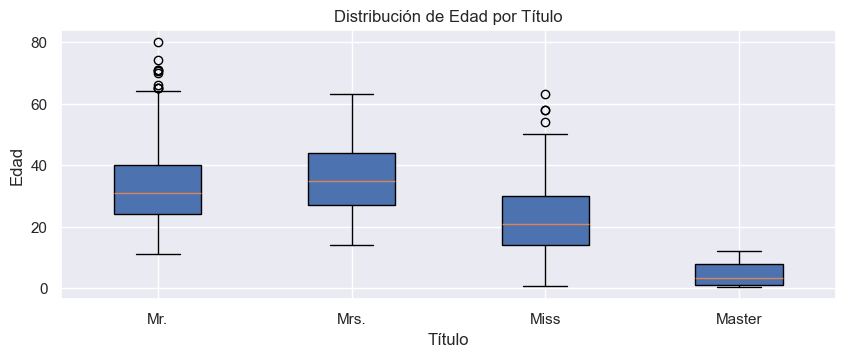

In [230]:
mr_age = df.loc[df.Name.str.contains('Mr.')].Age.dropna()
mrs_age = df.loc[df.Name.str.contains('Mrs.')].Age.dropna()
miss_age = df.loc[df.Name.str.contains('Miss')].Age.dropna()
master_age = df.loc[df.Name.str.contains('Master')].Age.dropna()

ages = [mr_age, mrs_age, miss_age, master_age]

# Títulos correspondientes
titles = ['Mr.', 'Mrs.', 'Miss', 'Master']

fig, ax = plt.subplots(figsize=(10, 3.5))
ax.boxplot(ages, tick_labels=titles, patch_artist=True)
ax.set_title('Distribución de Edad por Título')
ax.set_xlabel('Título')
ax.set_ylabel('Edad')

plt.show()

Extraigo el titulo de cada pasajero, creando la columna `Title` para guardar estos resultados.

In [231]:
df.loc[:, 'Title'] = df.Name.str.extract(r' ([A-Za-z]+)\.')
df[['Name', 'Title']].sample(5)

,Name,Title
788,"Dean, Master. Bertram Vere",Master
305,"Allison, Master. Hudson Trevor",Master
683,"Goodwin, Mr. Charles Edward",Mr
274,"Healy, Miss. Hanora ""Nora""",Miss
742,"Ryerson, Miss. Susan Parker ""Suzette""",Miss


En el codigo a continuación, lo que busco hacer es, ver de cada titulo en el nombre, cuantos sobrevivieron y cuantos no pudieron.

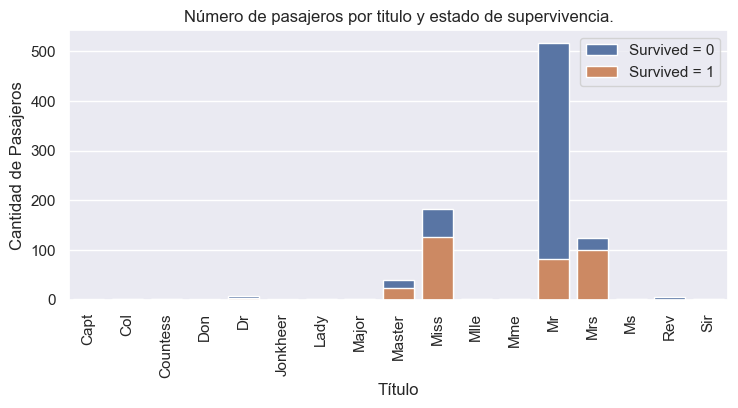

In [232]:
test = df.copy()
test['Died'] = test.Survived.apply(lambda x: 1 if x == 0 else 0)

survived_by_title = test[['Title', 'Survived', 'Died']].groupby('Title').sum().reset_index()

survived_by_title['Total'] = survived_by_title.Survived + survived_by_title.Died

plt.figure(figsize=(8.5, 3.5))
sns.barplot(x='Title', y='Total', data=survived_by_title, label='Survived = 0')
sns.barplot(x='Title', y='Survived', data=survived_by_title, label='Survived = 1')
plt.title('Número de pasajeros por titulo y estado de supervivencia.')
plt.xlabel('Título')
plt.ylabel('Cantidad de Pasajeros')

plt.xticks(rotation = 90)

plt.legend()
plt.show()

Antes que empezar a realizar cambios, quiero eliminar la columna `Name` para que no cause errores.

In [233]:
df = df.drop(['Name'], axis = 1)
df.isna().sum()

PassengerId      0
Survived         0
Age            177
Fare             0
FamilySize       0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title            0
dtype: int64

El grafico muestra que los titulos mas frecuentes entre los pasajeros son: Mr, Mrs, Miss y Master. Por ende, solo voy hacer un `OneHotEncoder` a estos titulos para poder tener una columna para cada uno (solamente valores binarios).

Además, investigando un poco, descubrí que el título `Mlle` (abreviatura de mademoiselle) es el equivalente en francés de `Miss` en inglés, y que `Mme` (abreviatura de madame) corresponde a `Mrs`. **Cambie estos valores por sus equivalentes en inglés.**

In [234]:
df.Title = df.Title.replace({'Mlle': 'Miss', 'Mme': 'Mrs'})

titulos_frecuentes = df.Title.value_counts().reset_index().Title[:4].values

df_num = pd.get_dummies(df[df['Title'].isin(titulos_frecuentes)], prefix = 'Title')
df_num.head()

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,22.0,7.2500,1,False,True,False,False,True,False,False,True,False,False,True,False
1,2,1,38.0,71.2833,1,True,False,True,False,False,True,False,False,False,False,False,True
2,3,1,26.0,7.9250,0,True,False,False,False,True,False,False,True,False,True,False,False
3,4,1,35.0,53.1000,1,True,False,True,False,False,False,False,True,False,False,False,True
4,5,0,35.0,8.0500,0,False,True,False,False,True,False,False,True,False,False,True,False


In [235]:
df_num.isna().sum()

PassengerId       0
Survived          0
Age             176
Fare              0
FamilySize        0
Sex_female        0
Sex_male          0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
dtype: int64

Aprovechando la columna de `Age_wiki` del dataset extendido, quiero asignar a los pasajeros que tienen la edad como valor vacio, los valores de las edades sacadas de wikipedia. Para eso, hago un *merge* entre ambos dataframes y asi conecto las columnas.

In [236]:
# A los registros que tienen nulos en la columna Age, le asigno el valor de Age_wiki
df_num = df_num.merge(df_ext[['PassengerId', 'Age_wiki']], how = 'inner', on = 'PassengerId')
df_num.Age = df_num.Age.fillna(df_num.Age_wiki)

print(df_num.isna().sum())

PassengerId     0
Survived        0
Age             4
Fare            0
FamilySize      0
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Age_wiki        4
dtype: int64


In [237]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   867 non-null    int64  
 1   Survived      867 non-null    int64  
 2   Age           863 non-null    float64
 3   Fare          867 non-null    float64
 4   FamilySize    867 non-null    int64  
 5   Sex_female    867 non-null    bool   
 6   Sex_male      867 non-null    bool   
 7   Pclass_1      867 non-null    bool   
 8   Pclass_2      867 non-null    bool   
 9   Pclass_3      867 non-null    bool   
 10  Embarked_C    867 non-null    bool   
 11  Embarked_Q    867 non-null    bool   
 12  Embarked_S    867 non-null    bool   
 13  Title_Master  867 non-null    bool   
 14  Title_Miss    867 non-null    bool   
 15  Title_Mr      867 non-null    bool   
 16  Title_Mrs     867 non-null    bool   
 17  Age_wiki      863 non-null    float64
dtypes: bool(12), float64(3), int64

Como noto que quedan cuatro registros con los valores de edad como nulos, decido imputarle los valores de la mediana de la columna `Age`. Es necesario que aplique esta modificación mediante un `transformer` para que pueda aprender de este dataset y pueda aplicarlo posteriormente con el dataset de prueba.

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

transformer = ColumnTransformer(
    transformers=[
        ('age_imputer', SimpleImputer(strategy='mean'), ['Age'])
    ],
    remainder='passthrough'
)

df_num[['Age']] = transformer.fit_transform(df_num[['Age']])

In [239]:
df_num.loc[df_num.Age.isna()]

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Age_wiki


In [240]:
df_num.isna().sum()

PassengerId     0
Survived        0
Age             0
Fare            0
FamilySize      0
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Age_wiki        4
dtype: int64

Ahora si puedo eliminar las columnas que no me suman.

In [241]:
df_num = df_num.drop(['Age_wiki', 'PassengerId'], axis = 1).astype(float)
df_num.head()

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [242]:
df_num['IsAlone'] = df_num.FamilySize.apply(lambda x: 1 if x == 0 else 0)
df_num = pd.get_dummies(df_num, columns=['IsAlone'], prefix = 'IsAlone')

df_num.sample(5)

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone_0,IsAlone_1
341,1.0,28.964276,16.1000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True,False
149,0.0,55.500000,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,True
36,0.0,21.000000,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,True
611,0.0,21.000000,7.8542,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,True
471,0.0,9.000000,46.9000,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,True,False


In [243]:
df_num['FareXPassenger'] = df_num.Fare / (df_num.FamilySize + 1) #Agrego uno para aquellos que no tienen familia, para que no genere error se dividirá por uno
df_num.sample(3)

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone_0,IsAlone_1,FareXPassenger
162,1.0,9.0,20.525,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,True,False,6.841667
443,0.0,30.0,27.750,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,27.750000
604,0.0,34.0,14.400,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,False,4.800000


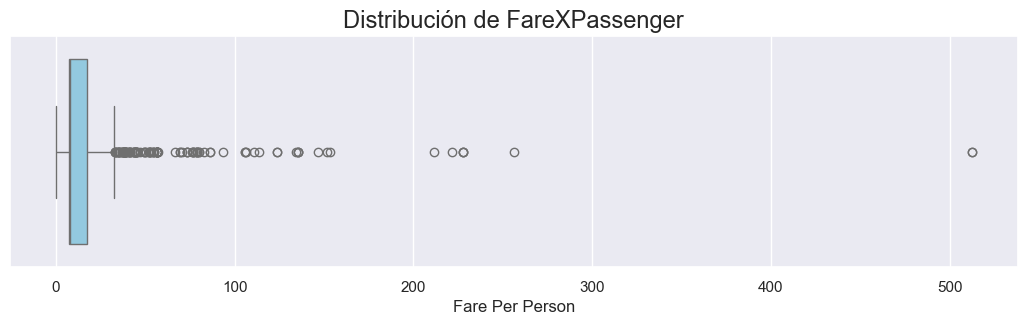

In [244]:
plt.figure(figsize=(13, 3))
sns.boxplot(data=df_num, x='FareXPassenger', color='skyblue')
plt.title("Distribución de FareXPassenger", fontsize = 17)
plt.xlabel("Fare Per Person")
plt.show()


#### Correlaciones entre variables.

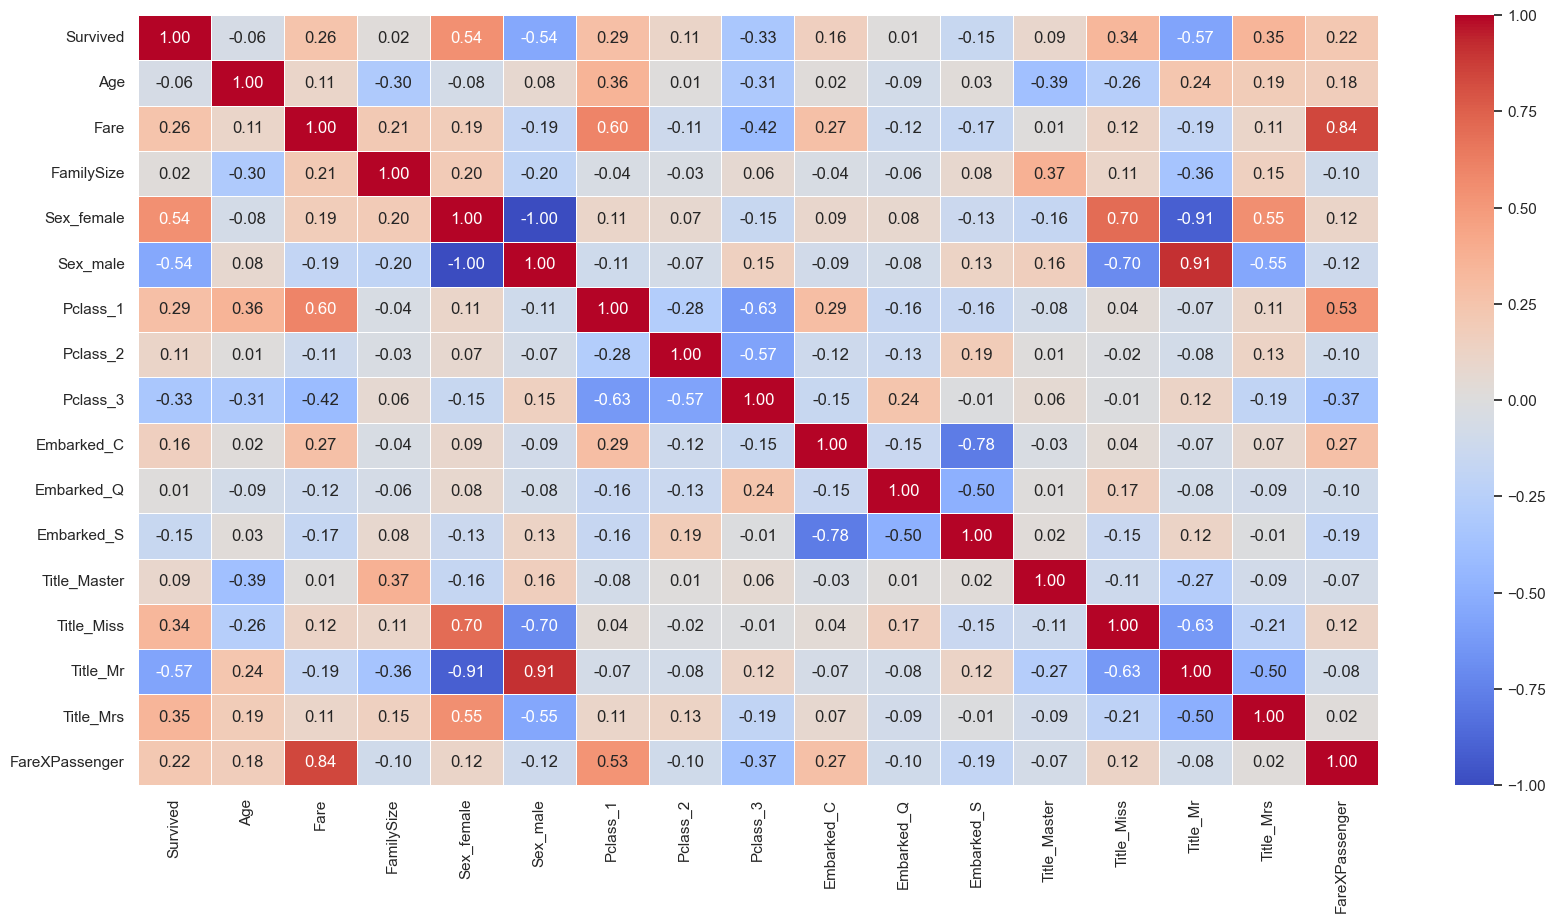

In [245]:
correlacion = df_num[df_num.describe().columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [246]:
from sklearn.feature_selection import mutual_info_classif

x, y = df_num.drop('Survived', axis = 1), df_num.Survived
mutual = pd.DataFrame(data = mutual_info_classif(x, y), index = x.columns, columns = ['value']).reset_index()

In [247]:
mutual.sort_values('value', ascending = False)

,index,value
13,Title_Mr,0.179588
1,Fare,0.141341
4,Sex_male,0.134563
3,Sex_female,0.134114
17,FareXPassenger,0.130685
7,Pclass_3,0.050340
5,Pclass_1,0.050303
14,Title_Mrs,0.043189
12,Title_Miss,0.038345
2,FamilySize,0.028081


Basandome en lo que muestra el mutual information, puedo decir que las columnas que representan los puertos de embarque (Embarked_S, Embarked_C, Embarked_Q) no le aportarán suficiente valor al modelo para las predicciones. Ademas, tiene logica pensar que asi sea ya que al momento del accidente, los pasajeros estaban dispersados en todo el barco. Es por esta razon por la cual decido eliminar estas columnas del dataset. (no siempre tener mas información es mejor.)

In [248]:
df_num.drop(columns = ['Embarked_S', 'Embarked_C', 'Embarked_Q'], inplace = True)
df_num.sample(3)

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone_0,IsAlone_1,FareXPassenger
340,1.0,40.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,True,13.000000
610,1.0,20.0,15.7417,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,False,5.247233
310,1.0,26.0,7.8542,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False,True,7.854200


#### Aplico el `ColumnTransformer`

In [249]:
df_num = df_num.astype(float)

In [250]:
from sklearn.preprocessing import MinMaxScaler

t1 = ColumnTransformer(transformers = [
    ('age_imputer', SimpleImputer(strategy='median'), ['Age'])
    ], remainder='passthrough')

t2 = ColumnTransformer(transformers = [
    ('minmax', MinMaxScaler(), ['Age', 'Fare', 'FareXPassenger'])
    ], remainder='passthrough')

df_num[['Age']] = t1.fit_transform(df_num[['Age']])
df_num[['Age', 'Fare', 'FareXPassenger']] = t2.fit_transform(df_num[['Age', 'Fare', 'FareXPassenger']])

transformers = (t1, t2)

In [253]:
df_num.sample(3)

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone_0,IsAlone_1,FareXPassenger
322,1.0,0.384267,0.040062,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.013354
846,1.0,0.044986,0.021731,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.007244
412,0.0,0.120382,0.047138,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015713


In [252]:
df_num.isna().sum()

Survived          0
Age               0
Fare              0
FamilySize        0
Sex_female        0
Sex_male          0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
IsAlone_0         0
IsAlone_1         0
FareXPassenger    0
dtype: int64

Finalmente, el dataset quedo totalmente limpio y estandarizado, listo para poner a entrenar el modelo.

In [255]:
df_num.head()

,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone_0,IsAlone_1,FareXPassenger
0,0.0,0.271174,0.014151,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.007076
1,1.0,0.472229,0.139136,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.069568
2,1.0,0.321438,0.015469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.015469
3,1.0,0.434531,0.103644,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.051822
4,0.0,0.434531,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.015713
